# Análise exploratória dos microdados do Enem 2019 no Distrito Federal

Este notebook foi criado para colocar em prática os ensinamentos de análise exploratória aprendidos durante a Imersão Dados promovida pela Alura.

Os dados foram disponibilizados por Antônio Salvador Neto, através do [link](https://www.kaggle.com/dataset/eeebf2b4e3352e5ae3bbc7f985dd1edd7e11904a687431737859b3bd8f93cc64), onde ele deixa separado os dados do Enem 2019 para cada Estado brasileiro.

## Importação das bibliotecas

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o dataset

In [25]:
dados = pd.read_csv("df.csv.txt", sep=";")
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,4791,190001009418,2019,5300108,Brasília,53,DF,20,M,1,1,1,1506138.0,Redenção,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CBCCADEBCEEBECABDCBAEDBDCDBBAAEABBEBBEBAECAAC,BCDDA99999CBDAEEECCCBBE*DEDCBCADEBAABDAAECBCCA...,BCCADEBBABCBADAACEDBDEACBABECEDBEACCECBBAEEAD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,140.0,160.0,140.0,700.0,D,E,C,D,2,G,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B
1,36545,190001041173,2019,5300108,Brasília,53,DF,17,F,1,3,1,1302603.0,Manaus,13.0,AM,2,0,2,1.0,0,53000986.0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,EEBCAEDBADBEABABEBABCCAACDBBEBCCCACBAECBBEABB,EDBCE99999ABBCBDDAAEADDDEAADDCDBBCDCDECEBAECBD...,ECEADDABABCBADEBCEBBDECECEBBCEDCBCACBAABDBCAC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,140.0,180.0,120.0,720.0,G,G,D,D,2,I,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B
2,118819,190001123448,2019,5300108,Brasília,53,DF,22,F,1,3,1,2205805.0,Luzilândia,22.0,PI,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,CEAACEBABABDAAACEDAECABACDEEEBAABAECDAAEEBDEE,99999BAABEABECABEAAECADAADACBCBBABACEEBEEAEECA...,DDDEBBBBCEBBABECADEDECCCCACAAABCEEDADEBCAEDDE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,160.0,120.0,160.0,100.0,660.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B
3,123789,190001128418,2019,5300108,Brasília,53,DF,21,F,1,3,1,3529401.0,Mauá,35.0,SP,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,C,3,B,A,B,C,A,A,B,B,A,A,A,A,A,B,B,B,C,A,A,B
4,127961,190001132590,2019,5300108,Brasília,53,DF,19,F,1,3,1,5300108.0,Brasília,53.0,DF,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,F,F,4,D,C,C,C,B,A,B,A,B,A,B,A,A,C,B,A,C,B,B,B


### Exibindo as colunas do dataset

In [26]:
dados.columns.values

array(['ID', ' NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPL

### Separando as notas das provas e somando todas para obter a nota final do aluno.

In [27]:
provas = ["NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
# Criando nova coluna com a nota total do aluno.
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
dados.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,4791,190001009418,2019,5300108,Brasília,53,DF,20,M,1,1,1,1506138.0,Redenção,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BCDDA99999CBDAEEECCCBBE*DEDCBCADEBAABDAAECBCCA...,BCCADEBBABCBADAACEDBDEACBABECEDBEACCECBBAEEAD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,140.0,160.0,140.0,700.0,D,E,C,D,2,G,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B,3052.1
1,36545,190001041173,2019,5300108,Brasília,53,DF,17,F,1,3,1,1302603.0,Manaus,13.0,AM,2,0,2,1.0,0,53000986.0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,EDBCE99999ABBCBDDAAEADDDEAADDCDBBCDCDECEBAECBD...,ECEADDABABCBADEBCEBBDECECEBBCEDCBCACBAABDBCAC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,140.0,180.0,120.0,720.0,G,G,D,D,2,I,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B,3235.4
2,118819,190001123448,2019,5300108,Brasília,53,DF,22,F,1,3,1,2205805.0,Luzilândia,22.0,PI,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999BAABEABECABEAAECADAADACBCBBABACEEBEEAEECA...,DDDEBBBBCEBBABECADEDECCCCACAAABCEEDADEBCAEDDE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,160.0,120.0,160.0,100.0,660.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B,2618.8
3,123789,190001128418,2019,5300108,Brasília,53,DF,21,F,1,3,1,3529401.0,Mauá,35.0,SP,1,5,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,C,3,B,A,B,C,A,A,B,B,A,A,A,A,A,B,B,B,C,A,A,B,0.0
4,127961,190001132590,2019,5300108,Brasília,53,DF,19,F,1,3,1,5300108.0,Brasília,53.0,DF,2,0,2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,C,F,F,4,D,C,C,C,B,A,B,A,B,A,B,A,A,C,B,A,C,B,B,B,0.0


### Retirando os alunos que tiveram nota zero na soma total das provas.

In [28]:
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero.head()

,ID,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,4791,190001009418,2019,5300108,Brasília,53,DF,20,M,1,1,1,1506138.0,Redenção,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BCDDA99999CBDAEEECCCBBE*DEDCBCADEBAABDAAECBCCA...,BCCADEBBABCBADAACEDBDEACBABECEDBEACCECBBAEEAD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,140.0,120.0,140.0,160.0,140.0,700.0,D,E,C,D,2,G,B,C,D,B,A,B,B,B,A,B,A,A,C,A,A,C,A,B,B,3052.1
1,36545,190001041173,2019,5300108,Brasília,53,DF,17,F,1,3,1,1302603.0,Manaus,13.0,AM,2,0,2,1.0,0,53000986.0,5300108.0,Brasília,53.0,DF,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,...,EDBCE99999ABBCBDDAAEADDDEAADDCDBBCDCDECEBAECBD...,ECEADDABABCBADEBCEBBDECECEBBCEDCBCACBAABDBCAC,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,160.0,120.0,140.0,180.0,120.0,720.0,G,G,D,D,2,I,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,B,A,B,3235.4
2,118819,190001123448,2019,5300108,Brasília,53,DF,22,F,1,3,1,2205805.0,Luzilândia,22.0,PI,1,4,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,99999BAABEABECABEAAECADAADACBCBBABACEEBEEAEECA...,DDDEBBBBCEBBABECADEDECCCCACAAABCEEDADEBCAEDDE,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,160.0,120.0,160.0,100.0,660.0,F,E,D,B,4,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,D,B,A,B,2618.8
7,172793,190001177426,2019,5300108,Brasília,53,DF,21,F,1,3,1,5208707.0,Goiânia,52.0,GO,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,AEBBC99999BDACDCEACEEADDBDAADCEEAEDBDEAEBDECCD...,DCCDCBBCAACDBADBDBCDBDBDCEDBDCABDABEDEDBDABCD,0,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,120.0,120.0,120.0,120.0,60.0,540.0,F,G,D,D,4,I,A,C,C,C,A,B,A,B,A,B,A,B,B,B,B,E,B,C,B,2525.6
10,188235,190001192868,2019,5300108,Brasília,53,DF,24,F,1,1,1,1508100.0,Tucuruí,15.0,PA,1,6,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,...,BDABE99999EAAEADCBCEDEAECEDEECECECCAEBAADDAEBC...,ABCBAECDCDEBAECBECABCCEAADDEBCEABADABCEAABDEE,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,160.0,120.0,140.0,140.0,160.0,720.0,E,C,B,B,3,B,A,B,B,A,A,B,A,B,A,A,A,A,B,B,A,C,A,B,B,3007.2


### Verificando a participação de homens e mulheres entre os candidatos.

In [29]:
total_inscritos = len(dados)

feminino = dados.query("TP_SEXO == 'F'")
feminino = len(feminino)

masculino = dados.query("TP_SEXO == 'M'")
masculino = len(masculino)

candidatos_genero = pd.DataFrame(data = {'Gênero': ['Maculino', 'Feminino'], 'Número de Candidatos': [masculino, feminino],
                                        'Proporção': [(masculino/total_inscritos), (feminino/total_inscritos)]})

candidatos_genero

,Gênero,Número de Candidatos,Proporção
0,Maculino,38661,0.409753
1,Feminino,55691,0.590247


### Plotando em gráficos

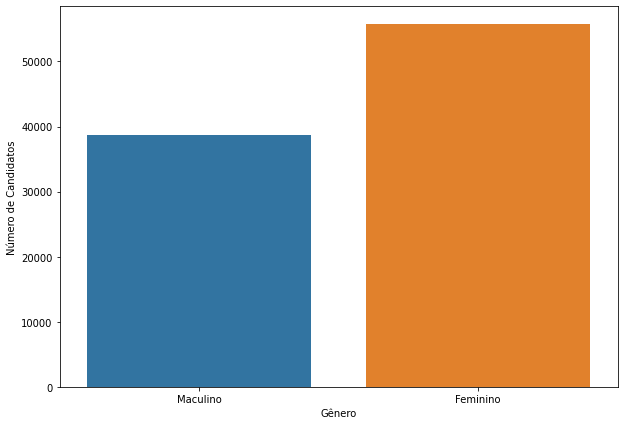

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(data = candidatos_genero, y = 'Número de Candidatos', x = 'Gênero')

### Conclusão

Em 2019, o número de participantes do sexo feminino foi maior que o número de participantes do sexo masculino

## Analisando as notas por gênero

In [31]:
dados_sem_nota_zero.groupby("TP_SEXO")["NU_NOTA_TOTAL"].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,42304.0,2577.452298,519.498678,323.2,2301.9,2576.6,2908.400,4039.2
M,28896.0,2653.559160,540.317315,323.6,2359.1,2682.3,3013.725,4082.8


### Plotando em gráfico

Text(0.5, 0.98, 'Nota Total por Gênero')

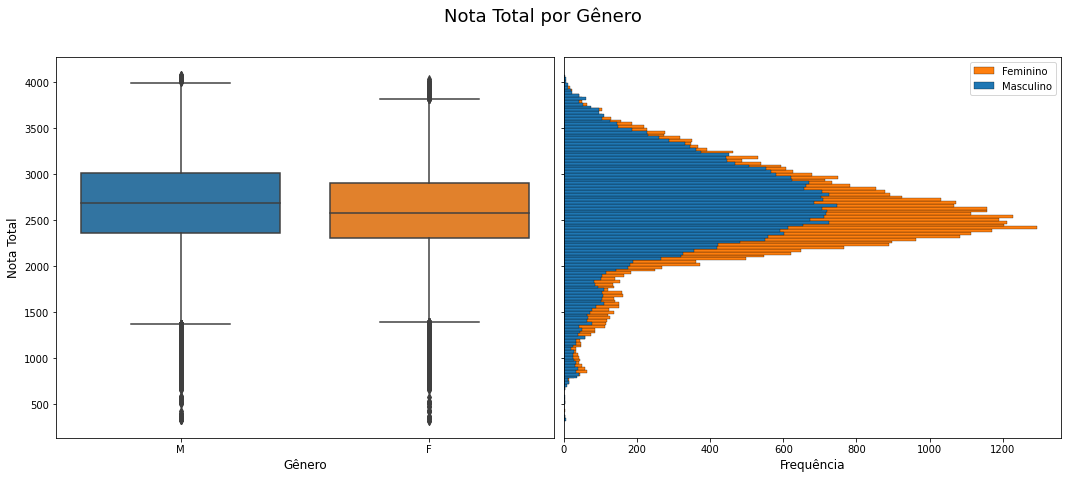

In [32]:
fig, ax = plt.subplots(1,2, sharey = 'row', figsize = (18,7))
plt.subplots_adjust(wspace = .02)

sns.boxplot(data = dados_sem_nota_zero, x = 'TP_SEXO', y = 'NU_NOTA_TOTAL', ax = ax[0])
sns.histplot(data = dados_sem_nota_zero, hue = 'TP_SEXO', y = 'NU_NOTA_TOTAL', legend = True, ax = ax[1], alpha = 1)
ax[0].set_xlabel('Gênero', fontsize = 'large')

ax[0].set_ylabel('Nota Total', fontsize = 'large')
ax[1].set_ylabel(None)
ax[1].set_xlabel('Frequência', fontsize = 'large')
ax[1].legend(['Feminino','Masculino'])

plt.suptitle('Nota Total por Gênero', fontsize =  '18')

### Exibindo as notas de cada prova por gênero

Text(0.5, 0.98, 'Nota em cada prova por gênero')

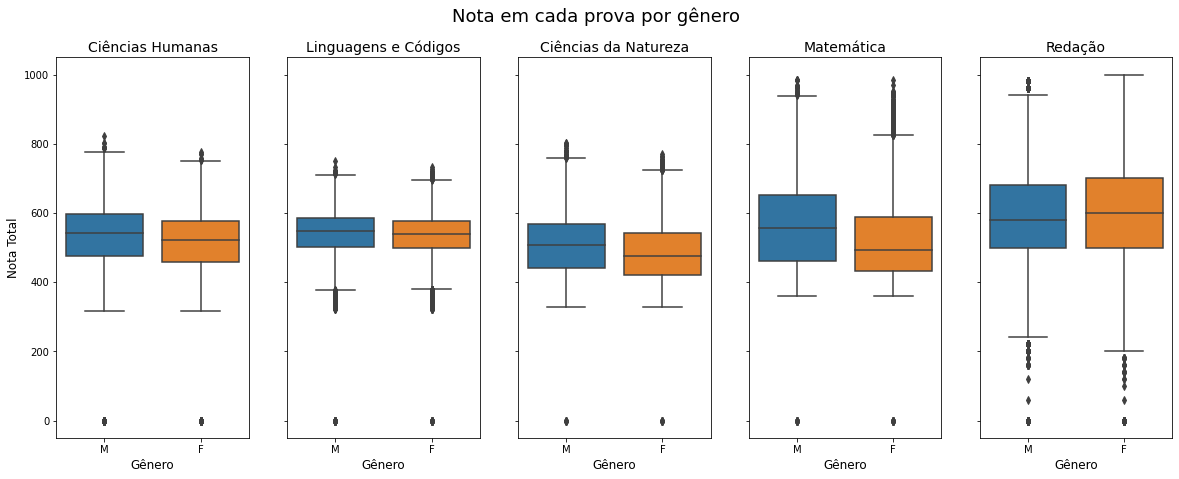

In [33]:
fig, ax = plt.subplots(1,5, sharey='row', figsize = (20,7))

sns.boxplot(data = dados_sem_nota_zero, x='TP_SEXO', y='NU_NOTA_CH', ax = ax[0])
sns.boxplot(data = dados_sem_nota_zero, x='TP_SEXO', y='NU_NOTA_LC', ax = ax[1])
sns.boxplot(data = dados_sem_nota_zero, x='TP_SEXO', y='NU_NOTA_CN', ax = ax[2])
sns.boxplot(data = dados_sem_nota_zero, x='TP_SEXO', y='NU_NOTA_MT', ax = ax[3])
sns.boxplot(data = dados_sem_nota_zero, x='TP_SEXO', y='NU_NOTA_REDACAO', ax = ax[4])

for i in range(5):
    ax[i].set_xlabel('Gênero', fontsize = 'large')
    ax[i].set_ylabel(None)

ax[0].set_ylabel('Nota Total', fontsize = 'large')

ax[0].set_title('Ciências Humanas', fontsize = '14')
ax[1].set_title('Linguagens e Códigos', fontsize = '14')
ax[2].set_title('Ciências da Natureza', fontsize = '14')
ax[3].set_title('Matemática', fontsize = '14')
ax[4].set_title('Redação', fontsize = '14')

plt.suptitle('Nota em cada prova por gênero', fontsize = '18')

### Conclusão

Pode-se concluir analisando os gráficos boxplot que as maiores difenrenças entre notas por gênero se dão em matemática e ciências da natureza.
No entando, as mulheres tiveram desempenho superior aos homens na prova de redação.

# Analisando a diferença de notas obtidas pelos inscritos agrupados por raça/cor:

In [34]:
notas_raca = pd.DataFrame(dados_sem_nota_zero[['TP_COR_RACA', 'NU_NOTA_TOTAL','TP_SEXO']])
nome_raca = notas_raca['TP_COR_RACA'].replace([0,1,2,3,4,5],['Não Declarada','Branca','Preta','Parda','Amarela','Indígena'])
notas_raca['TP_COR_RACA'] = nome_raca.values

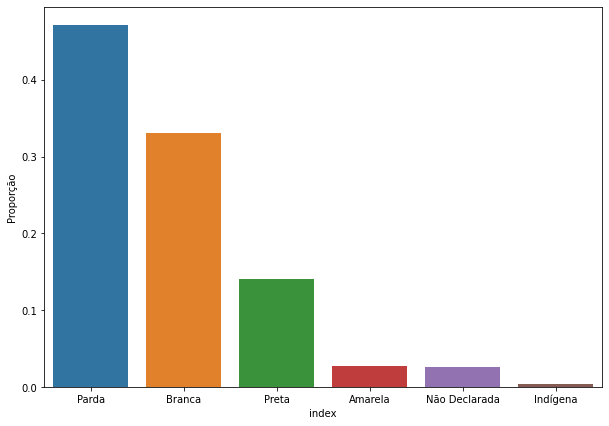

In [35]:
total_raca = pd.DataFrame(data = notas_raca['TP_COR_RACA'].value_counts())
total_raca = total_raca.reset_index()
total_raca['Proporção'] = total_raca['TP_COR_RACA'] / sum(total_raca['TP_COR_RACA'])

plt.figure(figsize=(10, 7))
sns.barplot(data = total_raca, x = 'index', y = 'Proporção')

Text(0, 0.5, 'Nota Total')

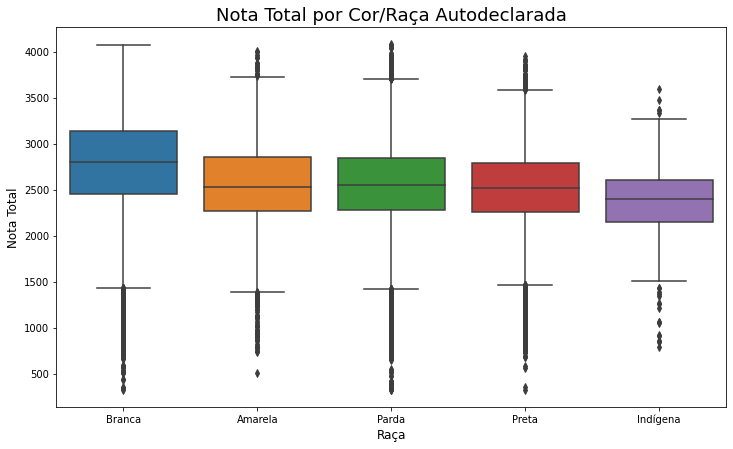

In [36]:
plt.figure(figsize=(12, 7))

sns.boxplot(data = notas_raca, x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', order = ['Branca', 'Amarela', 'Parda', 'Preta', 'Indígena'])

plt.title('Nota Total por Cor/Raça Autodeclarada', fontsize =  '18')
plt.xlabel('Raça', fontsize = 'large')
plt.ylabel('Nota Total', fontsize = 'large')

### Conclusão

Podemos visualizar nos gráficos que os candidatos que se autodeclararam de cor "Branca" tiveram notas melhores, já os candidatos que se autodeclararam de cor "Amarela", "Parda" e "Preta" ficaram com notas bem próximas, já os candidatos que se autodeclararam "Indígena" tiveram as menores notas.

# Analisando o desempenho dos candidatos por renda familiar

Onde A (nenhuma renda) e Q (renda superior a R$ 19.960,00 Reais).

Text(0, 0.5, 'Nota Total')

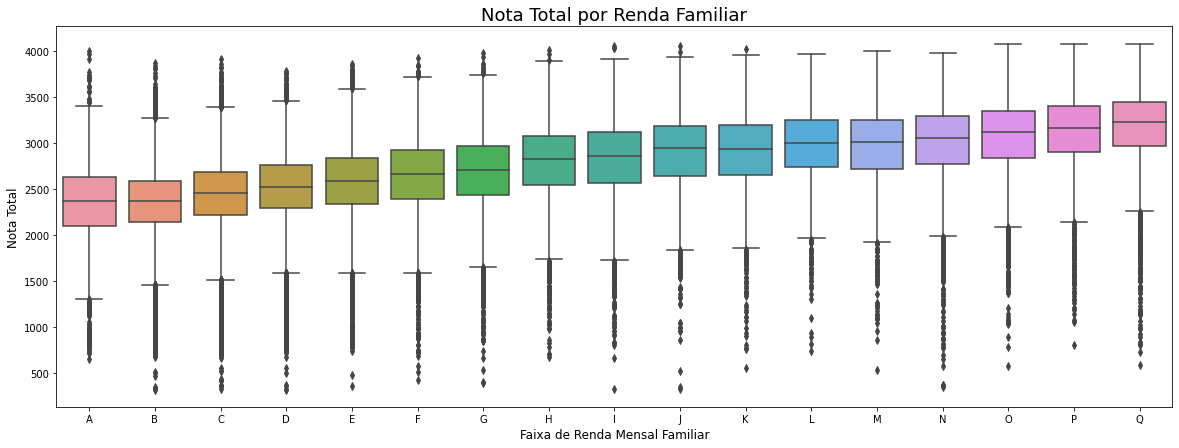

In [37]:
plt.figure(figsize=(20, 7))

sns.boxplot(data = dados_sem_nota_zero, x = 'Q006', y = 'NU_NOTA_TOTAL', order = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'])

plt.title('Nota Total por Renda Familiar', fontsize =  '18')
plt.xlabel('Faixa de Renda Mensal Familiar', fontsize = 'large')
plt.ylabel('Nota Total', fontsize = 'large')

### Conclusão

Olhando para o gráfico, fica visível a diferença de notas por renda familiar, ou seja, quanto maior a renda familiar, maior a nota do candidato.

### Analisando o gênero dos candidatos por renda familiar

Text(0, 0.5, 'Nota Total')

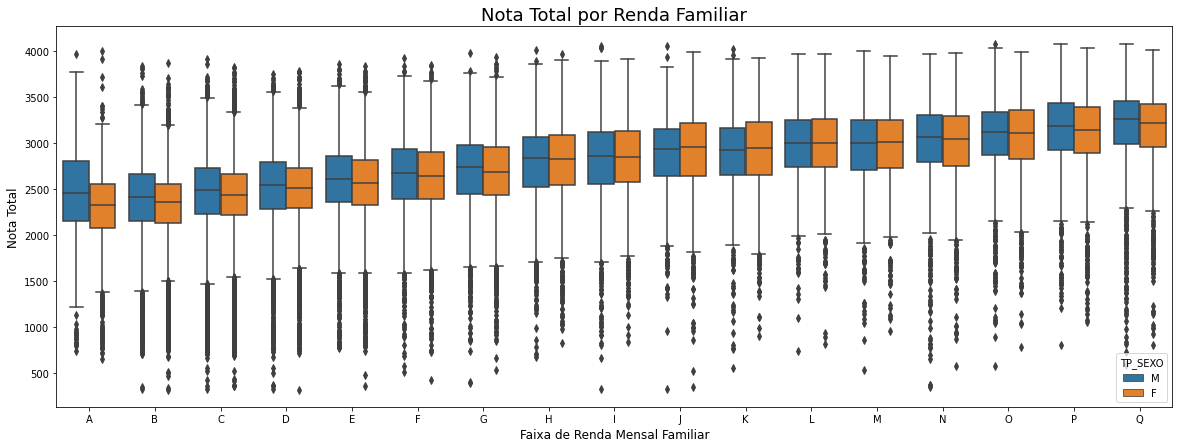

In [39]:
plt.figure(figsize=(20, 7))

sns.boxplot(data = dados_sem_nota_zero, x = 'Q006', y = 'NU_NOTA_TOTAL', order = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q'], hue = 'TP_SEXO')

plt.title('Nota Total por Renda Familiar', fontsize =  '18')
plt.xlabel('Faixa de Renda Mensal Familiar', fontsize = 'large')
plt.ylabel('Nota Total', fontsize = 'large')

### Conclusão

Nota-se que para os grupos com renda mais baixa a diferença de notas entre homens e mulheres é maior.